In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
city_df = pd.read_csv("raw_data/city_data.csv")
ride_df = pd.read_csv("raw_data/ride_data.csv")

In [3]:
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
city_df = city_df.drop_duplicates("city", keep = "first")

In [5]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
merged_df = city_df.merge(ride_df, on = 'city')
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [7]:
#group be city name
grouped_city = merged_df.groupby("city")

# Avg fare per city
avg_fare = grouped_city.mean()["fare"]

# Number of rides per city
rides = grouped_city["ride_id"].count()

# Number of drivers per city
drivers = grouped_city.mean()["driver_count"]

city_type = city_df.set_index("city")["type"]

# Dataframe for all key variables
city_info = pd.DataFrame({
    "Total Number of Rides (Per City)": rides,
    "Average Fare ($)": avg_fare,
    "Number of Drivers": drivers,
    "Type of City": city_type,
})

city_info.sort_values("Number of Drivers", ascending = False)



,Average Fare ($),Number of Drivers,Total Number of Rides (Per City),Type of City
Davidtown,22.978095,73.0,21,Urban
South Bryanstad,24.598571,73.0,21,Urban
Williamshire,26.990323,70.0,31,Urban
West Sydneyhaven,22.368333,70.0,18,Urban
Torresshire,24.207308,70.0,26,Urban
Fosterside,23.034583,69.0,24,Urban
Spencertown,23.681154,68.0,26,Urban
Alyssaberg,20.609615,67.0,26,Urban
Smithhaven,22.788889,67.0,27,Urban
Lisaville,28.428929,66.0,28,Urban


In [8]:
# Separated dfs for city categories
rural = city_info[city_info["Type of City"] == "Rural"]
suburban = city_info[city_info["Type of City"] == "Suburban"]
urban = city_info[city_info["Type of City"] == "Urban"]




In [9]:

# Color scheme dictionary and preview
color_scheme = {"Gold":"#FFD700", "Light Sky Blue":"#87CEFA", "Light Coral":"#F08080"}


# Color Dictionary 
city_color = {"Urban": color_scheme["Gold"], "Suburban": color_scheme["Light Sky Blue"], "Rural": color_scheme["Light Coral"]}
city_color



{'Rural': '#F08080', 'Suburban': '#87CEFA', 'Urban': '#FFD700'}

In [45]:
plt.suptitle("Pyber Ride Sharing Data", fontsize=14, fontweight='bold')

# Three scatter plots for each city type
plt.scatter(rural["Total Number of Rides (Per City)"], rural["Average Fare ($)"], s = rural["Number of Drivers"]*10, color = city_color["Rural"], edgecolor = "black", label = "Rural", alpha = .75)
plt.scatter(suburban["Total Number of Rides (Per City)"], suburban["Average Fare ($)"], s = suburban["Number of Drivers"]*10, color = city_color["Suburban"], edgecolor = "black", label = "Suburban", alpha = .75)
plt.scatter(urban["Total Number of Rides (Per City)"], urban["Average Fare ($)"], s = urban["Number of Drivers"]*10, color = city_color["Urban"], edgecolor = "black", label = "Urban", alpha = .75)

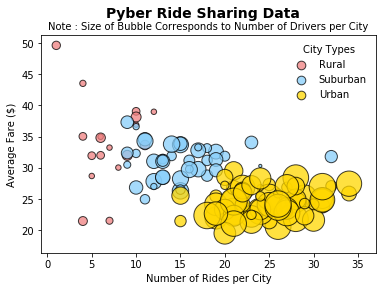

In [46]:
#print scatter plot
plt.title("Note : Size of Bubble Corresponds to Number of Drivers per City", fontsize=10, )
plt.xlabel("Number of Rides per City")
plt.ylabel("Average Fare ($)")



lgnd = plt.legend(frameon = False, edgecolor = "black", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()



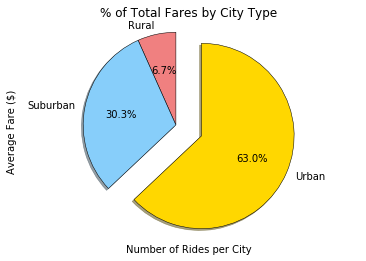

In [29]:
# Group by type to be used by all pie charts
by_type = merged_df.groupby("type")["type", "fare", "ride_id", "driver_count"]

# Percentage total fare by city type
fare_by_city = by_type.sum()["fare"]

# Build pie chart
labels = fare_by_city.index

# Reference to colors and explode for all pie charts
colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_by_city, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

# Display pie chart
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()

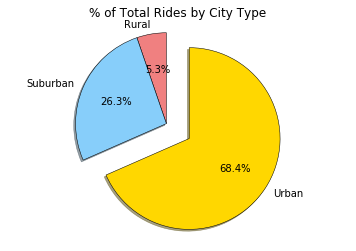

In [13]:
# Percentage of rides per city type
ride_by_city = by_type.count()["ride_id"]

labels = ride_by_city.index
plt.pie(ride_by_city, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()

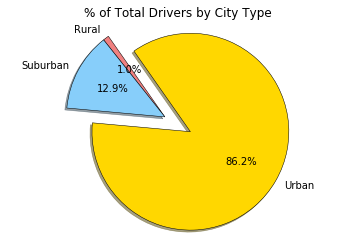

In [47]:
# Percentage of drivers per city type
driver_by_city = by_type.sum()["driver_count"]

labels = driver_by_city.index
plt.pie(driver_by_city, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()

In [15]:
# Observable Trends:
# --- Urban areas take the most number of rides as well as having lower average fare compared to other city types
# --- Rural areas take less uber compared to other city types
# --- Same results with regards to the number of drivers. Rural areas has lesser number of drivers and rates are higher compared to other city types.